## Project Challenge: Exploratory and predictive analytics upon the comprehensive IMDb data of movies released between 1980-2020

### **_by Hanlu He (s183909), Mia Hang Knudsen (s183998), Jiafei Xia (s213084), Atefeh Hemmati Golsefidi (s216676)_**
---
## _Notebook 1/2: Exploratory analysis of data_
---
## Table of Contents
- [Part 1: <u>Introduction</u>](#intro)
- [Part 2: <u>Data Preparation</u>](#dataprep)
    - [2.1: <u>Load and present basic information of the dataset</u>](#load)
    - [2.2: <u>Dicussion of profiler output</u>](#profiler) 
- [Part 3: <u>Data Cleaning and Exploratory Data Analysis</u>](#datacl)
    - [3.1: <u>Dealing with missing values and redefine variable types</u>](#clean1)
- [Part 4: <u>Insight Exploration</u>](#insights)
    - [4.1 <u>Adding new attributes</u>](#add_attri)

---
<a id='intro'></a>
## Part 1: _<u>Introduction</u>_

We will be working with dataset obtained through kaggle called [Comprehensive IMDb Data](https://www.kaggle.com/austinwolff/comprehensive-imdb-data). The dataset contains movies released in the USA between 1980-2020 that has available box office data. The dataset was created with the intention of what features/variables contribute most to the movie's box office success. Below is the features list that are included in the dataset.

**Features**

* **titleId**: IMDb's relational database ID for "title".
* **title**: Title of the movie.
* **rating**: MPAA (Motion Picture Association of America film rating system ) rating. 
* **region**: Region. 
* **genre**: The movie genre.
* **released**: Release date of the movie in theaters.
* **year**: Year of movie release.
* **month**: Month of movie release.
* **day**: Day of movie release.
* **score**: IMDb score.
* **director**: Director of the movie.
* **writer**: Writer of the movie.
* **star**: Main actor and actress of the movie.
* **country**: Main country of the movie.
* **budget**: Budget of the movie.
* **gross**: Gross revenue (box office) of the movie.
* **company**: Production company of the movie.
* **runtime**: Runtime of the movie in minutes. 
* **category**: Type of the credit this person ("primaryName") had for working on the movie. 
* **nconst**: IMDb's relational database ID for "primaryName".
* **primaryName**: Name of person who worked on the movie.
* **knownForTitles**: Top 4 titles an actor (indicated by "primaryName") is known for, by titleID. 

---
<a id='dataprep'></a>
## Part 2: _<u>Data Preparation</u>_

In [61]:
#data analysis libraries 
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

from pandas_profiling import ProfileReport

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 8)
sns.set_theme()
from ipywidgets import interact

%matplotlib inline

<a id='load'></a>
### 2.1: _<u>Load and present basic information of the dataset</u>_

In [2]:
df = pd.read_csv('Comprehensive IMDb Data.csv')
df.head().T

0  \
titleId                                       tt0081505   
title                                       The Shining   
rating                                                R   
region                                               US   
genre                                             Drama   
released                                     1980-06-13   
year                                               1980   
month                                              June   
day                                                13.0   
score                                               8.4   
director                                Stanley Kubrick   
writer                                     Stephen King   
star                                     Jack Nicholson   
country                                  United Kingdom   
budget                                       19000000.0   
gross                                        46998772.0   
company                                    Warner Bros.   
runtime                                           146.0   
category                                          actor   
nconst                                        nm0000197   
primaryName                              Jack Nicholson   
knownForTitles  tt0407887,tt0119822,tt0073486,tt0071315   

                                                      1  \
titleId                                       tt0118460   
title                                       The Shining   
rating                                                R   
region                                               US   
genre                                             Drama   
released                                     1980-06-13   
year                                               1980   
month                                              June   
day                                                13.0   
score                                               8.4   
director                                Stanley Kubrick   
writer                                     Stephen King   
star                                     Jack Nicholson   
country                                  United Kingdom   
budget                                       19000000.0   
gross                                        46998772.0   
company                                    Warner Bros.   
runtime                                           146.0   
category                                          actor   
nconst                                        nm0001836   
primaryName                                Steven Weber   
knownForTitles  tt0118460,tt0112896,tt0098948,tt0105414   

                                                      2  \
titleId                                       tt0118460   
title                                       The Shining   
rating                                                R   
region                                               US   
genre                                             Drama   
released                                     1980-06-13   
year                                               1980   
month                                              June   
day                                                13.0   
score                                               8.4   
director                                Stanley Kubrick   
writer                                     Stephen King   
star                                     Jack Nicholson   
country                                  United Kingdom   
budget                                       19000000.0   
gross                                        46998772.0   
company                                    Warner Bros.   
runtime                                           146.0   
category                                        actress   
nconst                                        nm0308371   
primaryName                              Cynthia Garris   
knownForTitles  tt0108941,tt0105428,tt01

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222569 entries, 0 to 222568
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   titleId         222569 non-null  object 
 1   title           222569 non-null  object 
 2   rating          221171 non-null  object 
 3   region          222569 non-null  object 
 4   genre           222569 non-null  object 
 5   released        221348 non-null  object 
 6   year            222569 non-null  int64  
 7   month           222150 non-null  object 
 8   day             221437 non-null  float64
 9   score           222569 non-null  float64
 10  director        222569 non-null  object 
 11  writer          222185 non-null  object 
 12  star            222569 non-null  object 
 13  country         222552 non-null  object 
 14  budget          163367 non-null  float64
 15  gross           222569 non-null  float64
 16  company         222225 non-null  object 
 17  runtime   

The dataset has __222569 observations and 22 features columns__. 5 of the features are of datatype floats, 1 is of type int and 16 are objects. From the Non-Null Count summary column we can see quite a few feature columns contain missing values, this will be explored more in depth in the next section. 

In [4]:
df.describe()

year            day          score        budget  \
count  222569.000000  221437.000000  222569.000000  1.633670e+05   
mean     2001.072499      16.515235       6.397761  3.389329e+07   
std        11.096449       8.657463       0.901579  3.783254e+07   
min      1980.000000       1.000000       1.900000  6.000000e+03   
25%      1992.000000       9.000000       5.800000  1.000000e+07   
50%      2002.000000      17.000000       6.400000  2.050000e+07   
75%      2011.000000      24.000000       7.000000  4.000000e+07   
max      2020.000000      31.000000       9.300000  3.560000e+08   

              gross        runtime  
count  2.225690e+05  222540.000000  
mean   7.203615e+07     107.143412  
std    1.511308e+08      17.135007  
min    3.090000e+02      63.000000  
25%    4.988181e+06      96.000000  
50%    1.976754e+07     105.000000  
75%    6.787628e+07     115.000000  
max    2.847246e+09     366.000000

As we can see the value range varies extensively across the features, which could be an indication that we should probably standardise the data for later predictive tasks.  

<a id='profiler'></a>
### 2.2: _<u>Dicussion of profiler output</u>_

__Now let's take a deeper dive into the data by presenting the pandas profiler output__

In [5]:
## create pandas profiler output 
profile = ProfileReport(df, title="The IMDb Movie dataset", html={'style': {'full_width': True}})
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]


First of all, in the Overview section we can see that there are 64146 missing values in total, which accounts for 1.3% of the observations in the dataset. And there are 6 duplicate rows. As for the variables, we have 16 that are categorical, 6 numeric. Below is a more detialed list of the feature types: 

**Features**

* **titleId**: Categorical - _Discrete and Nominal_
* **title**: Categorical - _Discrete and Nominal_ 
* **rating**: Categorical - _Discrete and Ordinal_  
* **region**: Categorical - _Discrete and Nominal_
* **genre**: Categorical - _Discrete and Nominal_
* **released**: Categorical - _Discrete and Ordinal_
* **year**: Numeric - _Continuous and Interval_ 
* **month**: Categorical - _Discrete and Ordinal_
* **day**: Numeric - _Continuous and Interval_
* **score**: Numeric - _Continuous and Ratio_ 
* **director**: Categorical - _Discrete and Nominal_
* **writer**: Categorical - _Discrete and Nominal_ 
* **star**: Categorical - _Discrete and Nominal_ 
* **country**: Categorical - _Discrete and Nominal_ 
* **budget**: Numeric - _Continuous and Ratio_ 
* **gross**: Numeric - _Continuous and Ratio_ 
* **company**: Categorical - _Discrete and Nominal_ 
* **runtime**: Numeric - _Continuous and Ratio_  
* **category**: Categorical - _Discrete and Nominal_ 
* **nconst**: Categorical - _Discrete and Nominal_
* **primaryName**: Categorical - _Discrete and Nominal_
* **knownForTitles**: Categorical - _Discrete and Nominal_

However, the default type of the feature variables such as "released" and "month" could be changed to numeric - _Continuous and Interval_. The reason for this is that they both contain quantative information and the distance between the values can be measured. 

Secondly, the specific missing values for each variable are summarized below: 

| Features | Missing (Count) | Missing (%) |
|----------|-----------------|-------------|
| Rating   | 1398            | 0.6%        |
| Released | 1221            | 0.5%        |
| Month    | 419             | 0.2%        |
| Day      | 1132            | 0.5%        |
| Writer   | 384             | 0.2%        |
| Country  | 17              | <0.1%       |
| Buget    | 59202           | 26.6%       |
| Company  | 344             | 0.2%        |
| Runtime  | 29              | <0.1%       |

As we can see that except for budget, the rest of the features only contains minimal missing values that are less than 1%. These could be dealt with by for example filling in values that are most common for "country", taking the mean of the values for "runtime" etc. The feature "budget" needs further exploration. 

---

<a id='datacl'></a>
## Part 3: _<u>Data Cleaning and Exploratory Data Analysis</u>_



The original dataset contains multiple observations per movie where there are varying number of unique values for each variable, thus resulting many rows with the repeated information in multiple variables. Since our main focus will be the individual movies, in order to have a better overview of their information we construct a more compact dataframe. Since each movie don't have one unique titleId we have created an extra column to the data which is contructed based on the movie __title_____year__ whith the assumption that only one movie will be made with the same title.The new dataframe with each movie as the row is described by the following attributes:

The variables we made changes to:

* **index**: TitleID of the movie
* **title**: Name of the movie corresponding to the titleID.
* **genre**: Array of genres the movie is associated to
* **directer**: Array of directors for the movie
* **writer**: Array of writers for the movie
* **star**: Array of stars for the movie
* **rating**: Array of ratings for the movie
* **writer**: Array of writers for the movie
* **country**: Array of stars for the movie
* **company**: Array of ratings for the movie
* **category**: Dictionary with primary names as keys and the corresponding role of the persons (primaryName) as values. e.g. {'Jason Mewes': 'actor', 'Robert Holtzman': 'producer', ... }
* **nconst**: Dictionary with primary names as keys and the corresponding ID of the persons (primaryName) as values. e.g. {'Jason Mewes': 'nm0582939','Robert Holtzman': 'nm0392692', ... }
* **primaryName**: Array of primary names
* **knownForTitles**: Dictionary with primary names as keys and the corresponding Top 4 titles of the persons (primaryName) as values. e.g. {'Jason Mewes': 'tt0120655,tt0109445,tt0261392,tt0424345','Robert Holtzman': 'tt0368447,tt0114746,tt0167404,tt0217869', ...}



The ones that are kept the same:
* **region**: Region
* **released**: Release date of the movie in theaters
* **year**: Year of movie release
* **month**: Month of movie release
* **day**: Day of movie release
* **budget**: Budget of the movie
* **gross**: Gross revenue (box office) of the movie
* **runtime**: Runtime of the movie in minutes


In [111]:
df['title_year'] = df['title'] + '_' + df['year'].astype(str)

## create profit column

df['Profit'] = df['gross'] - df['budget']
df.head()

titleId        title rating region  genre    released  year month   day  \
0  tt0081505  The Shining      R     US  Drama  1980-06-13  1980  June  13.0   
1  tt0118460  The Shining      R     US  Drama  1980-06-13  1980  June  13.0   
2  tt0118460  The Shining      R     US  Drama  1980-06-13  1980  June  13.0   
3  tt0118460  The Shining      R     US  Drama  1980-06-13  1980  June  13.0   
4  tt0118460  The Shining      R     US  Drama  1980-06-13  1980  June  13.0   

   score  ...      budget       gross       company runtime  category  \
0    8.4  ...  19000000.0  46998772.0  Warner Bros.   146.0     actor   
1    8.4  ...  19000000.0  46998772.0  Warner Bros.   146.0     actor   
2    8.4  ...  19000000.0  46998772.0  Warner Bros.   146.0   actress   
3    8.4  ...  19000000.0  46998772.0  Warner Bros.   146.0     actor   
4    8.4  ...  19000000.0  46998772.0  Warner Bros.   146.0     actor   

      nconst         primaryName                           knownForTitles  \
0  nm0000197      Jack Nicholson  tt0407887,tt0119822,tt0073486,tt0071315   
1  nm0001836        Steven Weber  tt0118460,tt0112896,tt0098948,tt0105414   
2  nm0308371      Cynthia Garris  tt0108941,tt0105428,tt0118460,tt0094919   
3  nm0887708  Melvin Van Peebles  tt0118460,tt0069996,tt0067810,tt0216587   
4  nm0574882      Courtland Mead  tt0118460,tt0126170,tt0069658,tt0110366   

         title_year      Profit  
0  The Shining_1980  27998772.0  
1  The Shining_1980  27998772.0  
2  The Shining_1980  27998772.0  
3  The Shining_1980  27998772.0  
4  The Shining_1980  27998772.0  

[5 rows x 24 columns]

In [7]:
## extract list of unique movie titles 
#titles=list(set(df['title']))
title_year_set = list(set(df['title_year']))

# Create a dataframe where each row is a unique movie 
movies={}
for t in title_year_set:
    # Create a temperary datframe for subset of with title_year = t
    df_temp = df[df.title_year == t]

    # Extracting all the unique values for the attributes for the given title_year t
    star = np.unique(df_temp['star'])
    writer = np.unique(df_temp['writer'])
    director = np.unique(df_temp['director'])
    title = np.unique(df_temp['title'])
    rating = np.unique(df_temp['rating'])
    genre =np.unique(df_temp['genre'])
    released = np.unique(df_temp['released'])
    year = np.unique(df_temp['year'])
    month = np.unique(df_temp['month'])
    day = np.unique(df_temp['day'])
    score = np.unique(df_temp['score'])
    country = np.unique(df_temp['country'])
    budget = np.unique(df_temp['budget'])
    gross = np.unique(df_temp['gross'])
    company = np.unique(df_temp['company'])
    runtime = np.unique(df_temp['runtime'])
    region = np.unique(df_temp['region'])
    titleId = np.unique(df_temp['titleId'])
    primaryName = np.unique(df_temp['primaryName'])

    # Extract attributes which are based on primaryName and then as dictionaries
    cat = {}
    ncon = {}
    prim = {}
    known = {}
    for index, row in df[df.title_year == t].iterrows():
        pN = row['primaryName']
        cat[pN] = row['category']
        ncon[pN] = row['nconst']
        known[pN] = row['knownForTitles']

    movie = {'titleId': titleId, 'title':title, 'rating':rating, 'region':region, 'genre': genre, 'released': released, 'year':year,
       'month':month, 'day':day, 'score':score, 'director':director, 'writer':writer, 'star':star, 'country':country,
       'budget':budget, 'gross':gross, 'company':company, 'runtime': runtime, 'primaryName':primaryName, 'category':cat, 'nconst':ncon, 'knownForTitles':known}
    movies[t]=movie

In [8]:
# Contruct dataframe 
d=pd.DataFrame(movies)
df2=d.transpose()
#df_movies = df_movies.astype({"score":float,"budget":float, "gross":float,"runtime":float})
df2.head().T

Crouching Tiger, Hidden Dragon_2000  \
titleId                                    [tt0190332, tt0795363]   
title                            [Crouching Tiger, Hidden Dragon]   
rating                                                    [PG-13]   
region                                                       [US]   
genre                                                    [Action]   
released                                             [2000-01-12]   
year                                                       [2000]   
month                                                   [January]   
day                                                        [12.0]   
score                                                       [7.8]   
director                                                [Ang Lee]   
writer                                            [Hui-Ling Wang]   
star                                               [Chow Yun-Fat]   
country                                                  [Taiwan]   
budget                                               [17000000.0]   
gross                                               [213525736.0]   
company                    [Asia Union Film & Entertainment Ltd.]   
runtime                                                   [120.0]   
primaryName     [Ang Lee, Chen Chang, Chow Yun-Fat, Du Lu Wang...   
category        {'Chow Yun-Fat': 'actor', 'Michelle Yeoh': 'ac...   
nconst          {'Chow Yun-Fat': 'nm0000334', 'Michelle Yeoh':...   
knownForTitles  {'Chow Yun-Fat': 'tt0473444,tt0190332,tt012000...   

                                              101 Dalmatians_1996  \
titleId                                    [tt0055254, tt0115433]   
title                                            [101 Dalmatians]   
rating                                                        [G]   
region                                                       [US]   
genre                                                 [Adventure]   
released                                             [1996-11-27]   
year                                                       [1996]   
month                                                  [November]   
day                                                        [27.0]   
score                                                       [5.7]   
director                                          [Stephen Herek]   
writer                                              [Dodie Smith]   
star                                                [Glenn Close]   
country                                           [United States]   
budget                                               [75000000.0]   
gross                                               [320689294.0]   
company                                    [Walt Disney Pictures]   
runtime                                                   [103.0]   
primaryName     [Betty Lou Gerson, Bill Peet, Clyde Geronimi, ...   
category        {'Betty Lou Gerson': 'actress', 'Bill Peet': '...   
nconst          {'Betty Lou Gerson': 'nm0314867', 'Bill Peet':...   
knownForTitles  {'Betty Lou Gerson': 'tt0042332,tt0053491,tt01...   

                                                        2012_2009  \
titleId              [tt1190080, tt1883119, tt1941433, tt5474810]   
title                                                      [2012]   
rating                                                    [PG-13]   
region                                                       [US]   
genre                                                    [Action]   
released                                             [2009-11-13]   
year                                                       [2009]   
month                                                  [November]   
day                                                        [13.0]   
score                                                       [5.8]   
director                                        [Roland Emmerich]   
writer                    

In [9]:
df_movies = df2.copy()

In [10]:
# Finding one value for budget for each title_year
df_movies['budget'] = df_movies['budget'].apply(lambda x: x if len(x) == 1 else [np.nanmean(x)])

C:\Users\hanlu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


In [11]:
df_movies['budget']

Crouching Tiger, Hidden Dragon_2000               [17000000.0]
101 Dalmatians_1996                               [75000000.0]
2012_2009                                        [200000000.0]
Big Top Pee-wee_1988                                     [nan]
October Sky_1999                                  [25000000.0]
                                                     ...      
Surveillance_2008                                  [3500000.0]
Unfinished Song_2012                                     [nan]
Hunter Killer_2018                                [40000000.0]
Hardball_2001                                     [32000000.0]
Harry Potter and the Prisoner of Azkaban_2004    [130000000.0]
Name: budget, Length: 7254, dtype: object

In [12]:
# Unpack array
col_unpack = ['title', 'rating', 'region', 'genre', 'released', 'year', 'month',
       'day', 'score', 'director', 'writer', 'star', 'country', 'budget',
       'gross', 'company', 'runtime']
       
for col in col_unpack:
    df_movies[col] = [i[0] for i in df_movies[col]]

---
<a id='clean1'></a>
### 3.1: _<u>Dealing with missing values and redefine variable types</u>_

In [13]:
print(f"The percentage of missing values in the budget attribute is {round(sum(df_movies.budget.isna())/len(df_movies) * 100,2)}%.")

The percentage of missing values in the budget attribute is 26.81%.


As we can see there is still 27% of data missing for the budget column, we will drop them as they make up largest proportion of missing data in our dataset which are hard to estimate with what we currently have. 

In [14]:
# Drop missing values in budget
df_movies = df_movies.dropna(subset=['budget'])

In [15]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5309 entries, Crouching Tiger, Hidden Dragon_2000 to Harry Potter and the Prisoner of Azkaban_2004
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   titleId         5309 non-null   object 
 1   title           5309 non-null   object 
 2   rating          5299 non-null   object 
 3   region          5309 non-null   object 
 4   genre           5309 non-null   object 
 5   released        5295 non-null   object 
 6   year            5309 non-null   int64  
 7   month           5304 non-null   object 
 8   day             5296 non-null   float64
 9   score           5309 non-null   float64
 10  director        5309 non-null   object 
 11  writer          5309 non-null   object 
 12  star            5309 non-null   object 
 13  country         5308 non-null   object 
 14  budget          5309 non-null   float64
 15  gross           5309 non-null   float64
 16  company 

In [18]:
print(df_movies.isnull().sum()/len(df_movies))

titleId           0.000000
title             0.000000
rating            0.001884
region            0.000000
genre             0.000000
released          0.002637
year              0.000000
month             0.000942
day               0.002449
score             0.000000
director          0.000000
writer            0.000000
star              0.000000
country           0.000188
budget            0.000000
gross             0.000000
company           0.000377
runtime           0.000188
primaryName       0.000000
category          0.000000
nconst            0.000000
knownForTitles    0.000000
dtype: float64


Below is the new table of missing values after dropping observations with no budget information. 

| Features | Missing (Count) | Missing (%) |
|----------|-----------------|-------------|
| Released | 14              | 0.19%       |
| Month    | 5               | <0.1%       |
| Day      | 13              | 0.24%       |
| Rating   | 10              | 0.2%        |
| Country  | 1               | <0.1%       |
| Company  | 2               | <0.1%       |
| Runtime  | 1               | <0.1%       |

To handle these missing values we will:

- Rating: since there is a category 'Not Rated' we will fille the missing vlues with this value. 
- Country and Company: fill in the with the most common value
- Runtime: fill in with the median value 

In [19]:
# Deling with missing values in rating
df_movies['rating'].fillna("Not Rated", inplace = True) 
df_movies['rating'] = df_movies['rating'].replace(['Unrated'],'Not Rated')
list(set(df_movies['rating']))

['TV-MA', 'X', 'G', 'R', 'PG-13', 'Not Rated', 'PG', 'Approved', 'NC-17']

In [20]:
df_movies.fillna({'country':df_movies.country.mode().astype(str)[0],
'company':df_movies.company.mode().astype(str)[0],'runtime':df_movies.runtime.median()},inplace=True)

#### STIL MISSING DEALING WITH RELEASED, MOPNTH, AND DAY.

In [21]:
len(set(df_movies[(df_movies['released'].isnull())].title)), len(set(df_movies[(df_movies['released'].isnull()) & ( df_movies['month'].isnull())].title))
# we can svae 9 movies if we removed released and day 

(14, 5)

In [45]:
np.sum(df_movies.isna())

titleId            0
title              0
rating             0
region             0
genre              0
released          14
year               0
month              5
day               13
score              0
director           0
writer             0
star               0
country            0
budget             0
gross              0
company            0
runtime            0
primaryName        0
category           0
nconst             0
knownForTitles     0
dtype: int64

We will create new column called released_2 that only consists of year and month information of movie release

In [33]:
df_movies = df_movies.dropna(subset=['month'])

In [34]:
## we will create new column called released_2 that only consists of year and month information of movie release
df_movies['released_2'] = str(df_movies['year']) + '_' + str(df_movies['month'])

Next we will redefine column data types where we will convert released as Datetime object, month as Categorical object. And we will also order the dataset by release date. 

In [35]:
df_movies['released'] = pd.to_datetime(df_movies['released'],format='%Y-%m-%d')
df_movies = df_movies.sort_values(by= ['released'])

The _month_ attribute contains str values, but for later visulization it would be beneficial to change the type to categorical thus we will be able to plot with the commen order (January, Feburary,...).

In [36]:
# Chagne type of month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_movies['months'] = pd.Categorical(df_movies['month'], categories=months, ordered=True)

In [37]:
# Convert the gross and budget from $ to Million $ 
df_movies['gross'] = df_movies['gross']/1000000
df_movies['budget'] = df_movies['budget']/1000000

In [38]:
df_movies = df_movies.reset_index().rename(columns = {'index':'title_year'})

---
<a id='insights'></a>
## Part 4: _<u>Insight Exploration</u>_
### 4.1: _<u>Score visualisation</u>_

show distribution of the scores

<AxesSubplot:xlabel='score', ylabel='Count'>

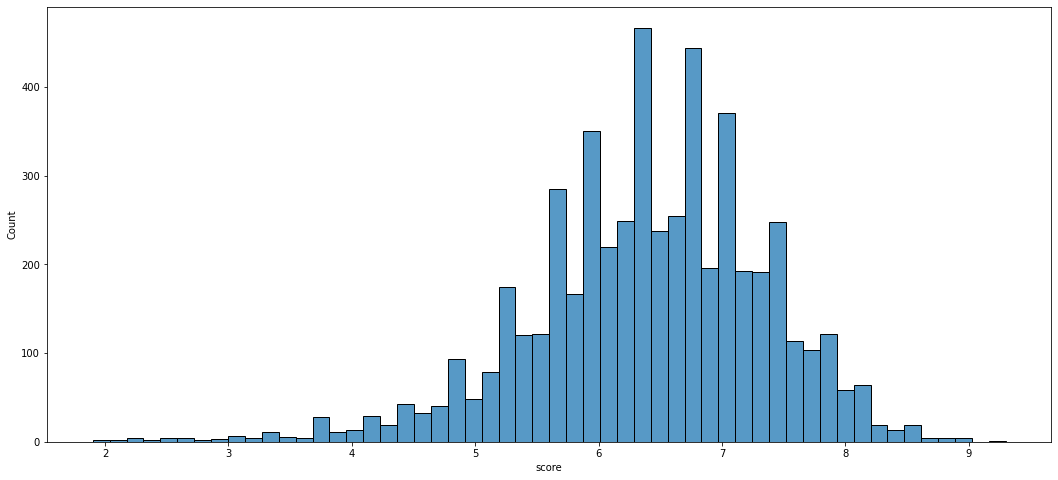

In [39]:
sns.histplot(data=df_movies, x="score")

show movies that received top scores 

In [40]:
df_movies[['title','score']].sort_values('score', ascending= False).reset_index(drop=True)[:10]

title  score
0                           The Shawshank Redemption    9.3
1                                    The Dark Knight    9.0
2      The Lord of the Rings: The Return of the King    8.9
3                                       Pulp Fiction    8.9
4                                   Schindler's List    8.9
5                                         Fight Club    8.8
6                                          Inception    8.8
7                                       Forrest Gump    8.8
8  The Lord of the Rings: The Fellowship of the Ring    8.8
9                                         The Matrix    8.7

### Gross visualisation
Show distribution of gross for movies

<AxesSubplot:xlabel='gross', ylabel='Count'>

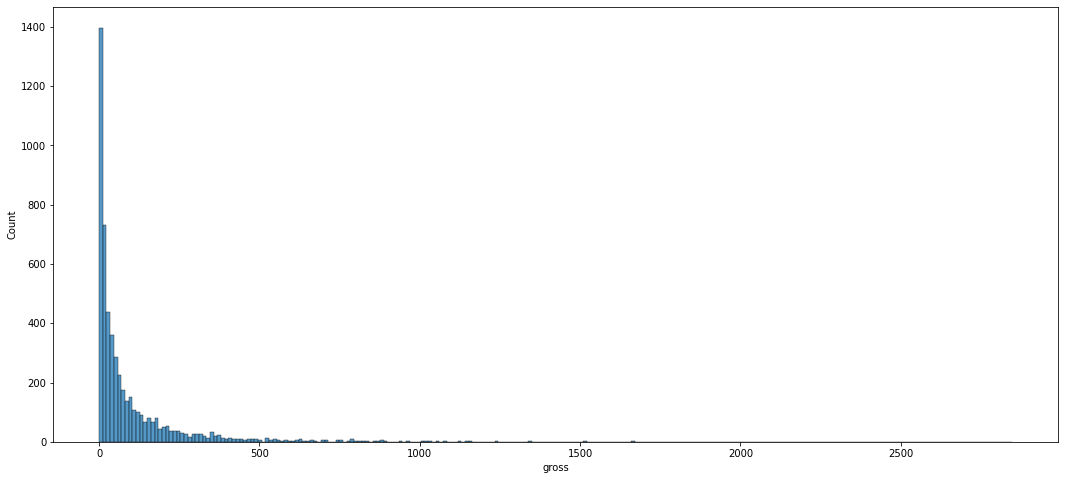

In [41]:
sns.histplot(data=df_movies, x="gross")

In [42]:
df_movies[['title','gross']].sort_values('gross', ascending= False).reset_index(drop=True)[:10]

title        gross
0                   Avatar  2847.246203
1        Avengers: Endgame  2797.501328
2                  Titanic  2201.647264
3   Avengers: Infinity War  2048.359754
4            The Lion King  1670.727580
5           Jurassic World  1670.516444
6             The Avengers  1518.815515
7                Furious 7  1515.341399
8                Frozen II  1450.026933
9  Avengers: Age of Ultron  1402.809540

### Genre visualisation

Show distribution of genres

<AxesSubplot:xlabel='genre', ylabel='Count'>

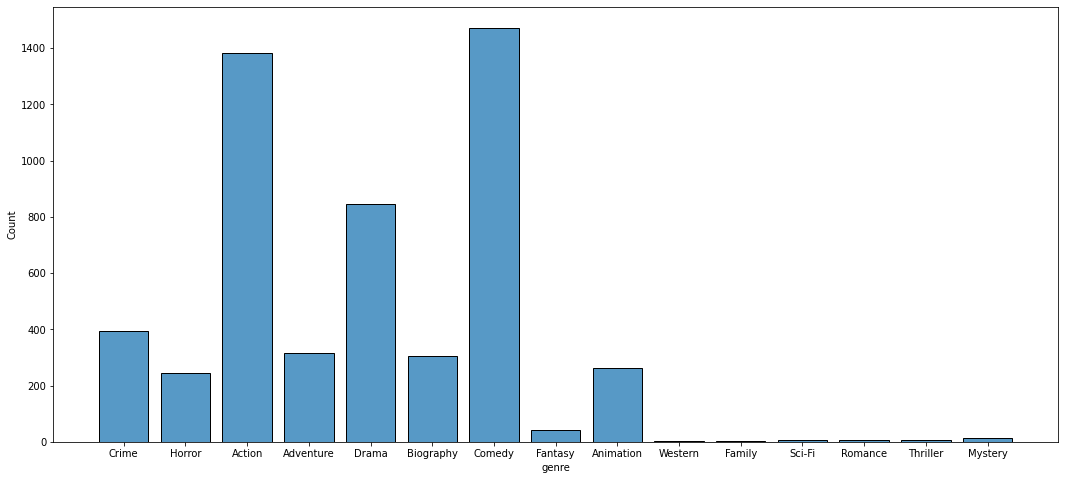

In [45]:
sns.histplot(data=df_movies, x="genre",shrink=.8)

<AxesSubplot:xlabel='gross', ylabel='genre'>

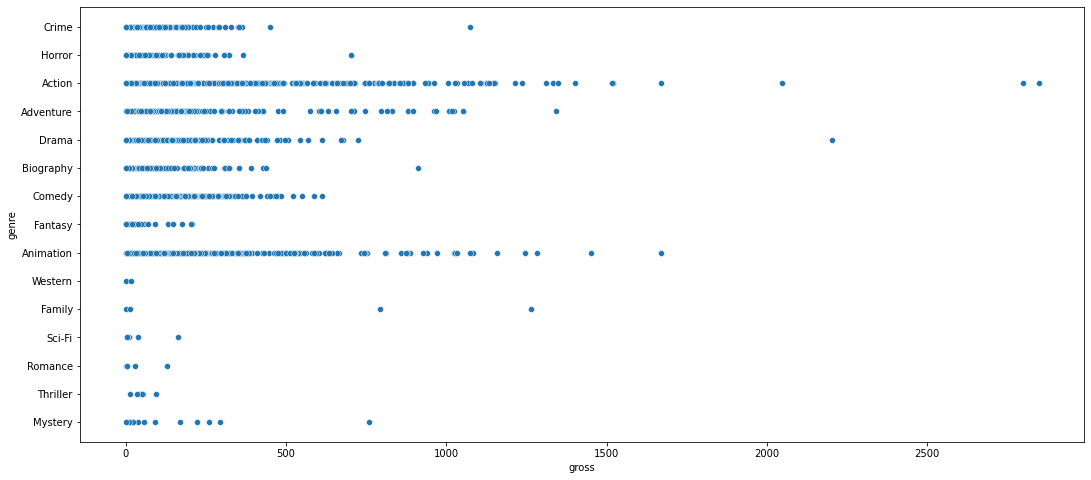

In [46]:
sns.scatterplot(data=df_movies, x="gross", y="genre")

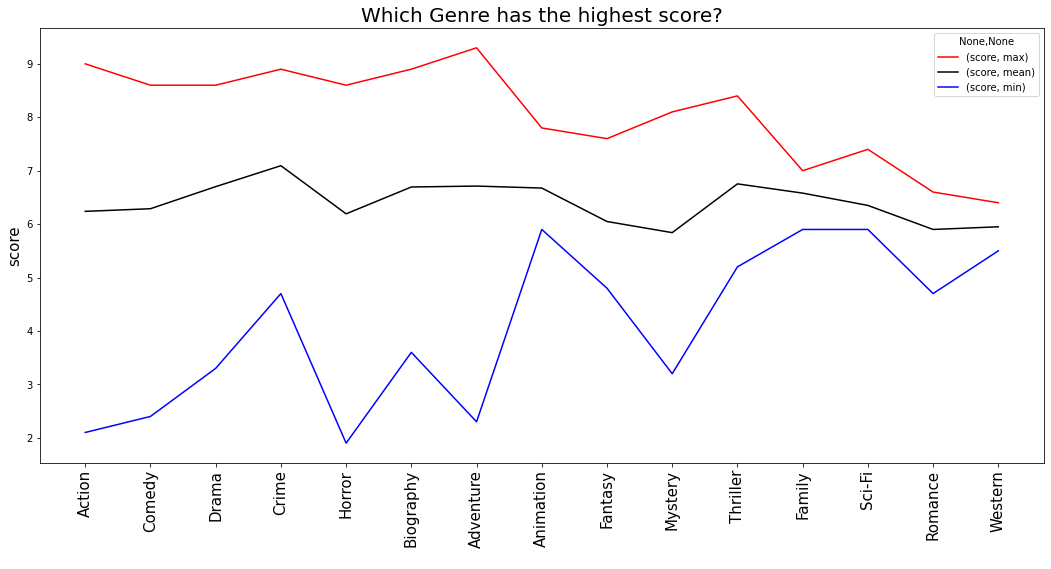

In [48]:
df_movies[['genre','score',]].groupby(['genre']).agg(['max','mean','min']).plot(style = '-', color = ['red','black','blue'])
plt.title('Which Genre has the highest score?', fontsize = 20)
plt.xticks(np.arange(15), ['Action', 'Comedy', 'Drama', 'Crime', 'Horror', 'Biography',
'Adventure', 'Animation', 'Fantasy', 'Mystery', 'Thriller', 'Family',
'Sci-Fi', 'Romance', 'Western'], rotation = 90, fontsize = 15)
plt.ylabel('score', fontsize = 15)
plt.xlabel(' ',)
plt.show()

A movie will be categorized as a flop if the budget is larger then the gross. In the following part the percentage of flops for different genres. 

In [49]:
# Define function for computing percentage of flops
def flop_genre (x):
        df_genre = df_movies.loc[df_movies['genre'].str.contains(x)]
        flops = df_movies[df_movies['budget'] > df_movies['gross']]
        genre_flops = df_genre[df_genre['budget'] > df_genre['gross']]

        # Plot
        fig, (ax1, ax2) = plt.subplots(1,2)

        labels = ['Flops', 'Hit']
        colors = ['orange', 'green']
        explode = (0.1, 0)  # explode 1st slice
        total_flops = [len(flops.index), str((len(df_movies.index) - len(flops.index)))]
        patches, texts, autotext = ax1.pie(total_flops,explode=explode, colors=colors, autopct='%1.1f%%',startangle=90)
        ax1.set_title('Total Box Office Flops')
        ax1.legend(patches, labels, loc="best")
        ax1.axis('equal')

        genre_flops = [len(genre_flops.index), str((len(df_genre.index) - len(genre_flops.index)))]
        patches, texts, autotext = ax2.pie(genre_flops,explode=explode, colors=colors, autopct='%1.1f%%',startangle=90)
        titlee = f"{x} Film Box Office Flops"
        ax2.set_title(titlee)
        ax2.legend(patches, labels, loc="best")
        ax2.axis('equal')
        

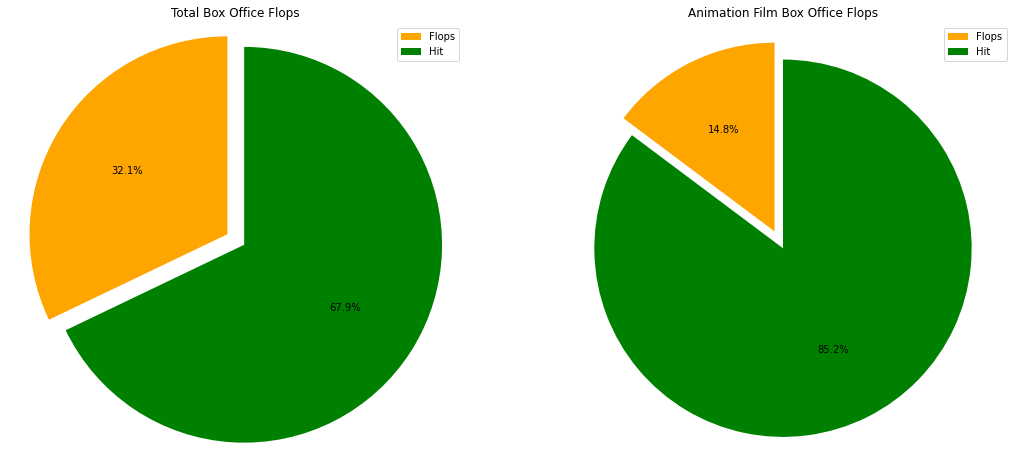

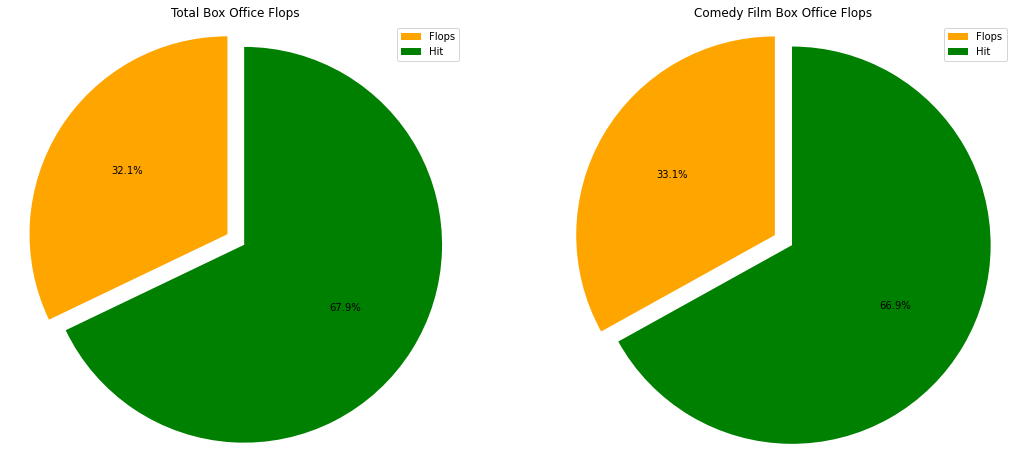

In [50]:
flop_genre('Animation')
flop_genre('Comedy')

<AxesSubplot:title={'center':' Percentage of movies that received 7 or more in score for each genre (%)'}, ylabel='genre'>

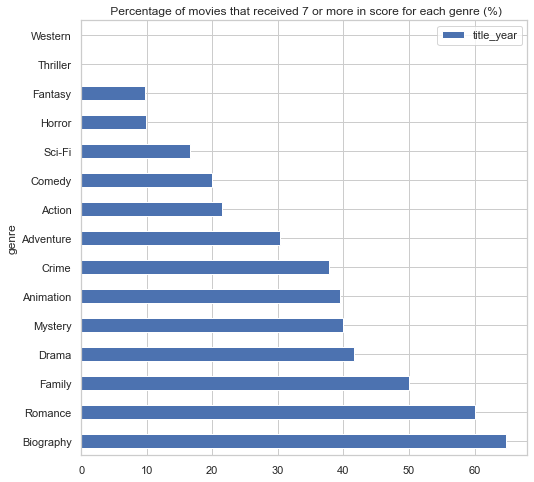

In [130]:
# Should change to be based on amout of movie in the given genre
df1 = df_movies[df_movies['score'] >=7]
df21 = (pd.DataFrame((df1.groupby('genre').title_year.nunique()/(df_movies.groupby('genre').title_year.count()))*100).sort_values('title_year', ascending=False ))
df21[['title_year']].plot.barh(stacked=True, title = ' Percentage of movies that received 7 or more in score for each genre (%)', figsize=(8, 8))

### Movie release over time
Movie releases in the period 1980 to 2020

<AxesSubplot:xlabel='year'>

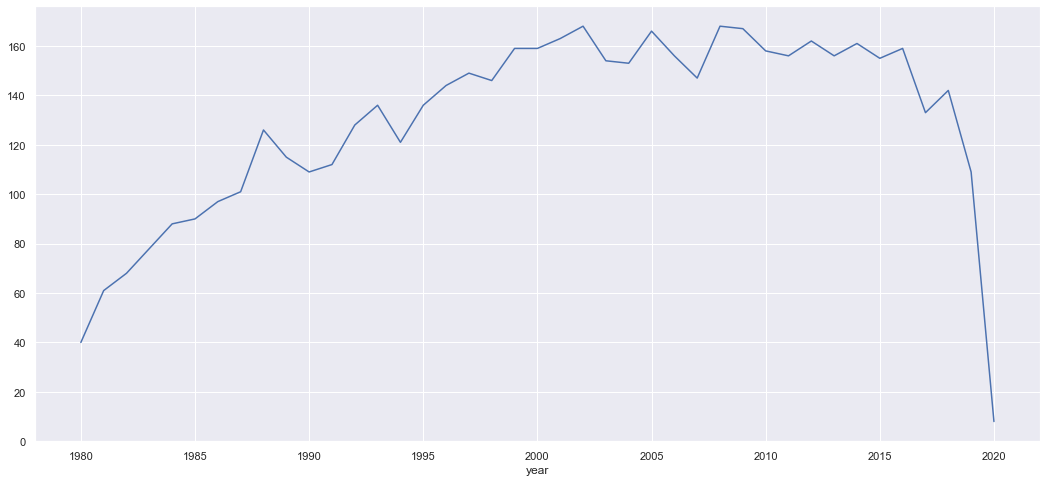

In [63]:
plt.rcParams['figure.figsize'] = (18, 8)
df_movies.groupby(['year']).count()['titleId'].plot()

We are also interested in what season there tend to have more movies released as an indication of the strength of compeition at different times of the year

<AxesSubplot:xlabel='month', ylabel='year'>

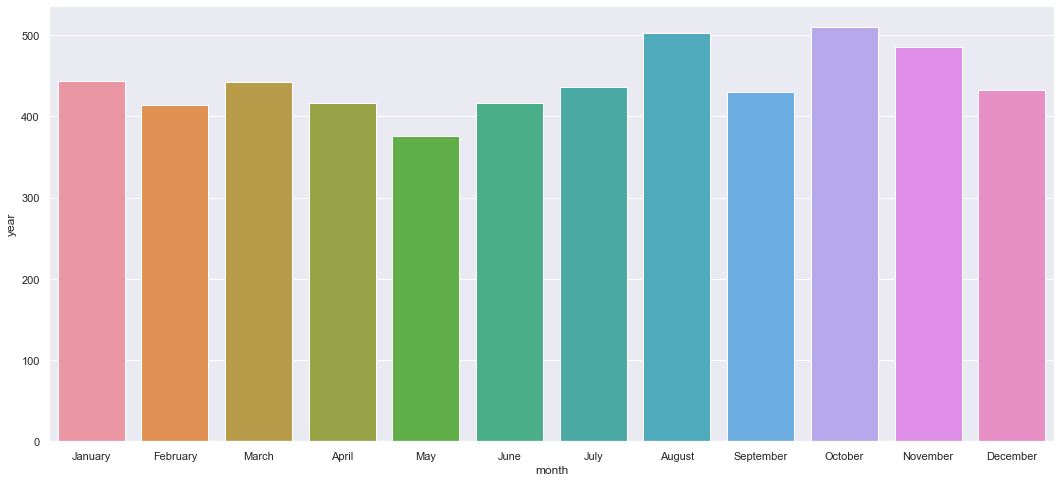

In [64]:
df_month = df_movies.groupby('month').count().reset_index()
sns.barplot(x = "month", y = "year", data = df_month, order = months )

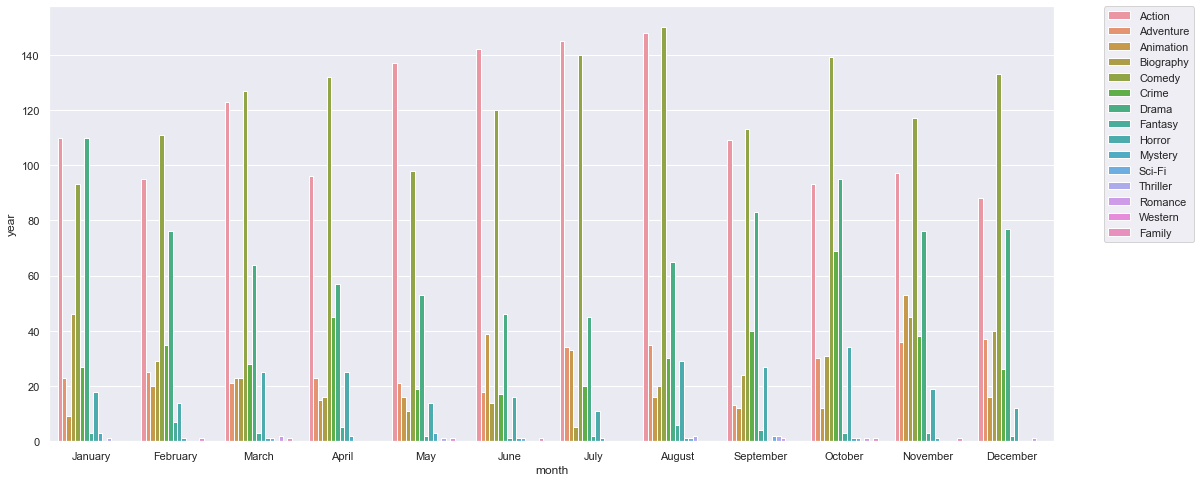

In [65]:
df_month_genre = df_movies.groupby(['month','genre']).count().reset_index()
sns.barplot(x = "month", y = "year", hue = 'genre', data = df_month_genre, order = months )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<a id='add_attri'></a>
### 4.2: _<u>Adding new attributes</u>_


Profit of a movie is computed by extracting the budget from the gross. For the data set a new column __Profit__ is created. 

[Text(0.5, 0, 'Profit in million US $'), Text(0, 0.5, 'Count')]

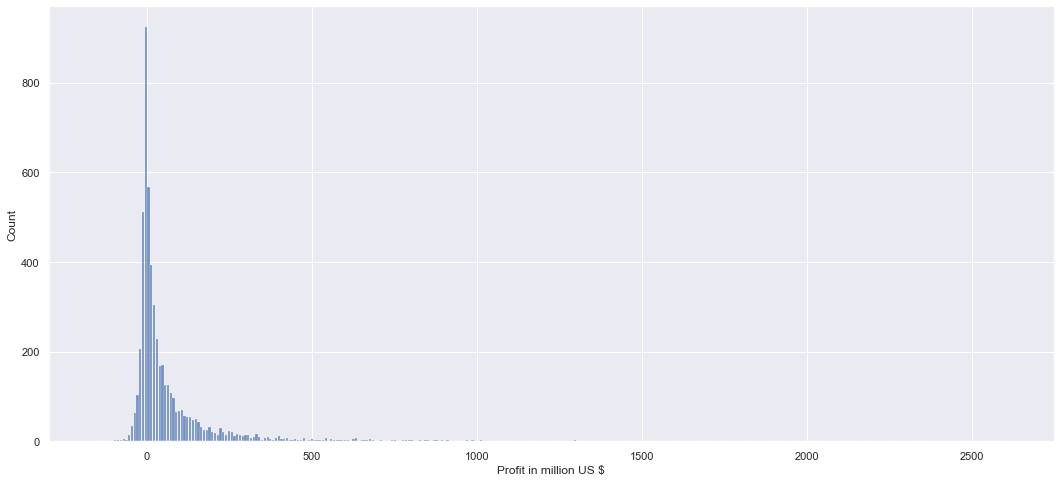

In [66]:
df_movies['Profit'] = df_movies['gross'] - df_movies['budget']
ax = sns.histplot(data=df_movies, x="Profit",shrink=.8)
ax.set(xlabel='Profit in million US $', ylabel='Count')

We can take a look at the to 10 most profitable movies in our dataset.

In [67]:
#let us also check the name of the Top 10 Profitable Movies.
df_movies[['title','Profit']].sort_values(by = 'Profit', ascending  = False).head(10).reset_index(drop=True)

title       Profit
0                                        Avatar  2610.246203
1                             Avengers: Endgame  2441.501328
2                                       Titanic  2001.647264
3                        Avengers: Infinity War  1727.359754
4                                Jurassic World  1520.516444
5                                 The Lion King  1410.727580
6                                     Furious 7  1325.341399
7                                     Frozen II  1300.026933
8                                  The Avengers  1298.815515
9  Harry Potter and the Deathly Hallows: Part 2  1217.321665

In [69]:
pd.set_option('max_rows', 100)
@interact
def show_movies_more_than(column_name='score', score_v=8.5):
    x = df_movies.loc[df_movies[column_name] > score_v][['year','title','director','star','company','Profit','score']]
    x = x.sort_values(by = 'score', ascending = False).reset_index(drop=True)
    return x

interactive(children=(Text(value='score', description='column_name'), FloatSlider(value=8.5, description='scor…

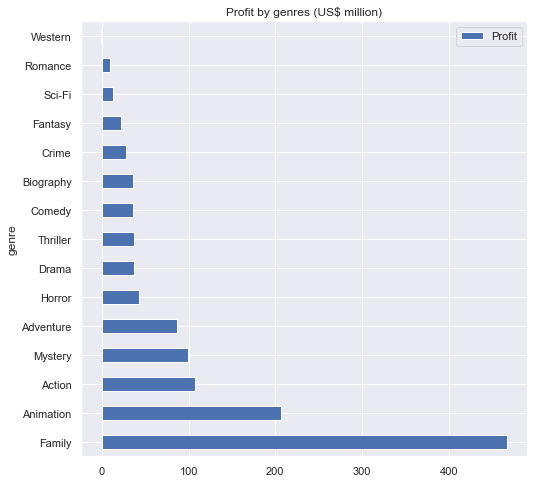

In [71]:
df31 = df_movies[['title', 'Profit','genre']]
df41 = df31.groupby(['genre']).mean()
df41.sort_values('Profit', ascending=False, inplace = True )
df41[['Profit']].plot.barh(stacked=True, title = 'Profit by genres (US$ million)', figsize=(8, 8))
plt.show()

#df41 = df41.reset_index(drop=False).rename(columns={'index':'genre'})

#sns.barplot(x = "genre", y = "Profit", data = df41, orient = 'v')


To look at the geographic distribution of movies a column continent is created such that unique values will be reduced to only 5. 

In [72]:
# Replacing outlier contries
df_movies['country'] = df_movies['country'].replace(['West Germany'],'Germany')
df_movies['country'] = df_movies['country'].replace(['Yugoslavia'],'Serbia')
df_movies['country'] = df_movies['country'].replace(['Federal Republic of Yugoslavia'],'Serbia')

In [74]:
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

df_movies['continent'] = df_movies['country'].apply(country_to_continent)

Most Profitable Years in Box Office


C:\Users\hanlu\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


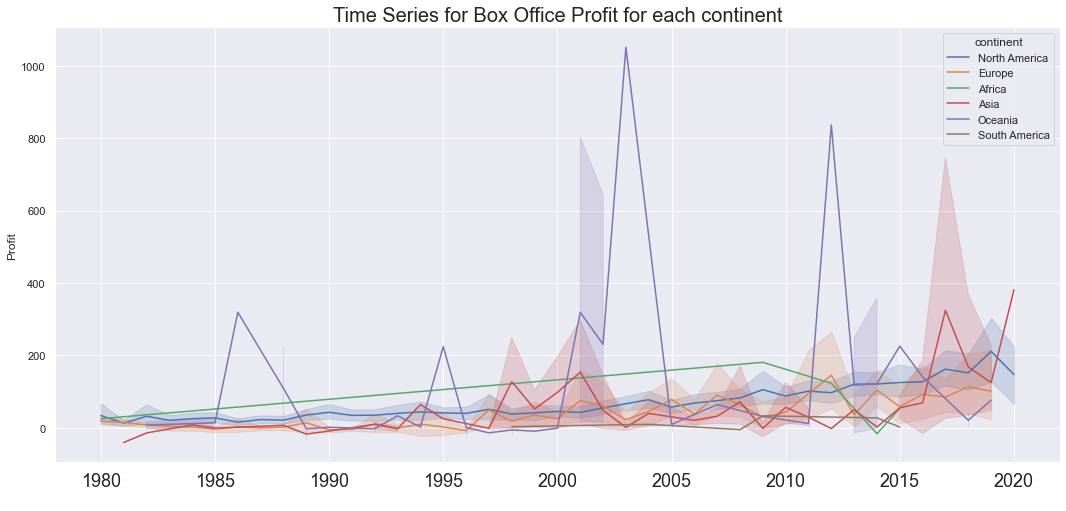

Movies that Made Losses


In [75]:
print('Most Profitable Years in Box Office')
display(df_movies[['year','continent','Profit']].groupby(['continent',
'year']).agg('sum').sort_values(by = 'Profit',
ascending = False).head(10).style.background_gradient(cmap = 'Greens'))

# Plot
sns.lineplot(df_movies['year'], df_movies['Profit'], hue = df_movies['continent'])
plt.title('Time Series for Box Office Profit for each continent', fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(' ')
plt.show()
print("Movies that Made Losses")

display(df_movies[df_movies['Profit'] < 0][['title_year','title','country','Profit']].groupby(['title']).agg('mean').head().style.background_gradient(cmap = 'Reds'))



Furthermore a column splitting the data into movies with short runtime and long runtime, the threshold was set to 120 minuts. 

In [76]:
# add duration
def duration(x):
    if x <= 120:
        return 'Short'
    else:
        return 'Long'
    
# lets apply this function on the duration column
df_movies['duration'] = df_movies['runtime'].apply(duration)
# lets check the values of Duration column
df_movies['duration'].value_counts()

Short    4206
Long     1098
Name: duration, dtype: int64

In [77]:
pd.set_option('max_rows', 100)
@interact
def show_movies_more_than(column=['budget','gross'], x=250):
        y = df_movies.loc[df_movies[column] > x][['title','duration','gross','Profit','score']]
        return y

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), IntSlider(v…

In [78]:
print("Average IMDB Score for Long Duration Movies is {0:.2f}".format(df_movies[df_movies['duration'] == 'Long']['score'].mean()))
print("Average IMDB Score for Short Duration Movies is {0:.2f}".format(df_movies[df_movies['duration'] == 'Short']['score'].mean()))

Average IMDB Score for Long Duration Movies is 7.01
Average IMDB Score for Short Duration Movies is 6.23


In [79]:
print("Highest Rated Long Duration Movie\n",
df_movies[df_movies['duration'] == 'Long'][['title','score']].sort_values(by = 'score', ascending = False).reset_index(drop=True).head(1))
print("\nHighest Rated Short Duration Movie\n",
df_movies[df_movies['duration'] == 'Short'][['title','score']].sort_values(by = 'score', ascending = False).reset_index(drop=True).head(1))

Highest Rated Long Duration Movie
                       title  score
0  The Shawshank Redemption    9.3

Highest Rated Short Duration Movie
                       title  score
0  The Silence of the Lambs    8.6


C:\Users\hanlu\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


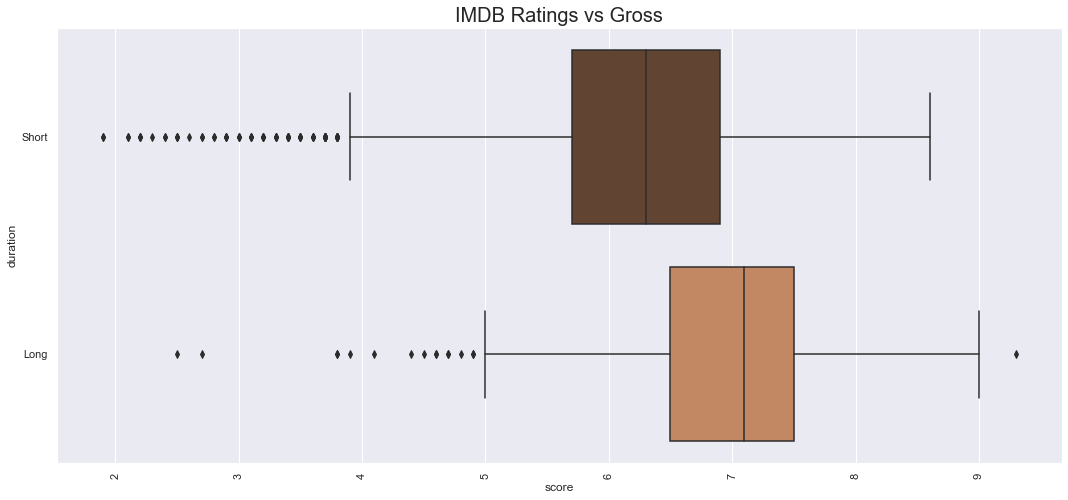

In [80]:
sns.boxplot(df_movies['score'], df_movies['duration'], palette = 'copper')
plt.title('IMDB Ratings vs Gross', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

C:\Users\hanlu\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Gross Comparison')

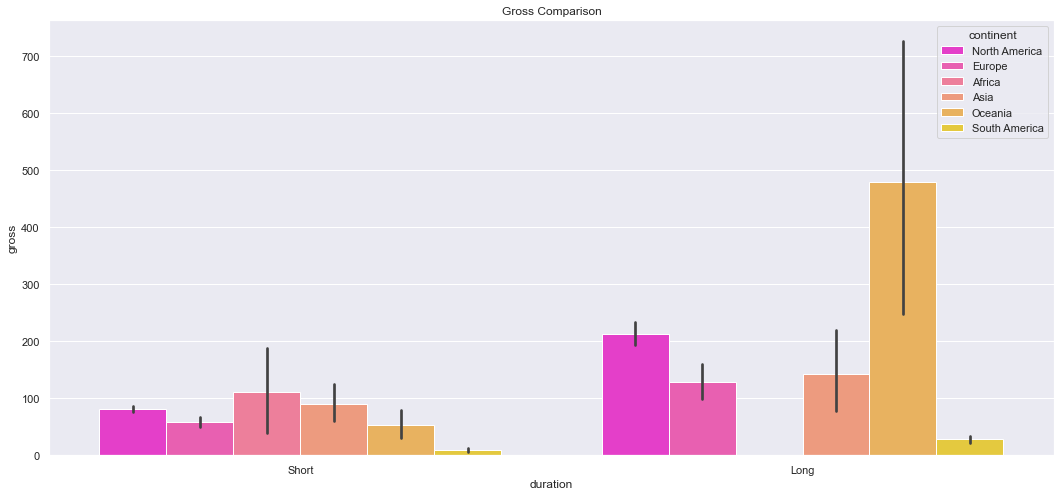

In [81]:
display(df_movies[df_movies['duration'] == 'Long'][['title_year','title', 'duration', 'gross','Profit']].groupby(['title_year','duration']).agg('mean').sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))
display(df_movies[df_movies['duration'] == 'Short'][['title_year','title', 'duration', 'gross','Profit']].groupby(['title_year','duration']).agg('mean').sort_values(by = 'Profit',ascending = False).head(5).style.background_gradient(cmap = 'spring'))
sns.barplot(df_movies['duration'], df_movies['gross'], hue = df_movies['continent'], palette = 'spring')
plt.title('Gross Comparison')

A column __nr_cast__ is defined with c ontains how many people were involvede in the production of the movies based on the _primaryName_

<AxesSubplot:xlabel='nr_cast', ylabel='Count'>

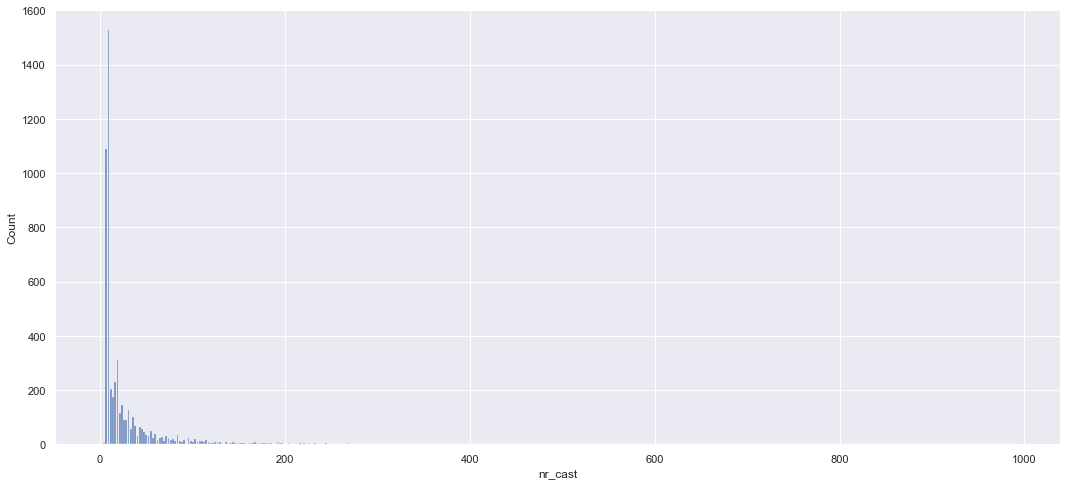

In [85]:
# amount of production people pr. movie 
df_movies['nr_cast'] = df_movies['category'].apply(lambda x: len(x.keys()))
sns.histplot(data=df_movies, x="nr_cast",shrink=.8 )

## Impact of director 

In [86]:
temp = df_movies.groupby(['title_year', 'director'], as_index=False)[['budget', 'gross', 'score']].mean().fillna(0)
temp = temp.groupby(['director'], as_index=False).agg({'budget': 'sum',
                                                        'gross': 'sum',
                                                        'score': 'mean',
                                                        'title_year': 'count'})
temp = temp.loc[temp.title_year >= 5]
temp.sort_values(['score'], ascending=False, inplace=True)
temp.head(20)

director    budget        gross     score  title_year
312      Christopher Nolan  1310.006  5153.547948  8.163636          11
1538     Quentin Tarantino   385.200  1870.119160  8.100000           9
455       Denis Villeneuve   279.800   676.821463  7.980000           5
771          James Cameron   748.900  6248.088578  7.871429           7
401          David Fincher   650.000  2142.317821  7.760000          10
1494         Peter Jackson  1021.000  5659.038275  7.740000          10
1249       Martin Scorsese  1127.300  2094.150897  7.673684          19
51          Alfonso Cuarón   350.000  1690.275994  7.600000           6
102          Anthony Russo  1151.000  6844.248984  7.580000           5
1985          Wes Anderson   184.000   447.004249  7.575000           8
189              Brad Bird   847.000  3426.901800  7.566667           6
1704            Sam Mendes   759.000  3100.009463  7.512500           8
912              Joel Coen   198.500   366.408729  7.510000          10
1464  Paul Thomas Anderson   192.000   283.359683  7.500000           8
882           Jim Jarmusch    38.490    73.074344  7.500000           8
1266        Matthew Vaughn   445.000  1411.574941  7.460000           5
416            David Lynch   105.500    88.674634  7.457143           7
1670          Ron Clements   398.000  1345.192927  7.440000           5
1453       Paul Greengrass   475.000  1600.624126  7.416667           6
1826      Steven Spielberg  1873.500  9239.123399  7.403846          26

In [88]:
# Stats information grouped by director
director_sum = df_movies.groupby('director').sum()
director_mean = df_movies.groupby('director').mean()
director_median = df_movies.groupby('director').median()
director_var = df_movies.groupby('director').var()
director_sem = df_movies.groupby('director').sem()

The correlation between the average budget and the average revenue is 0.79


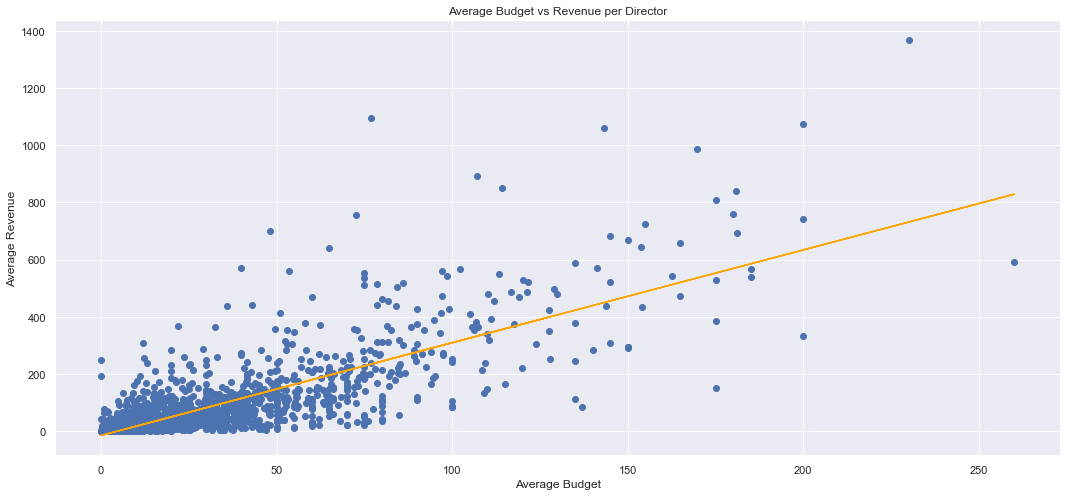

In [89]:
# Budget vs revenue
import scipy.stats as st
plt.scatter(director_mean['budget'],director_mean['gross'])
corr=round(st.pearsonr(director_mean['budget'],director_mean['gross'])[0],2)
print(f"The correlation between the average budget and the average revenue is {corr}")
model = st.linregress(director_mean['budget'],director_mean['gross'])
y_values = director_mean['budget']*model[0]+model[1]
plt.plot(director_mean['budget'],y_values,color='orange')
plt.xlabel('Average Budget')
plt.ylabel('Average Revenue')
plt.title('Average Budget vs Revenue per Director')
plt.show()

The correlation between the average budget and the average score is 0.15


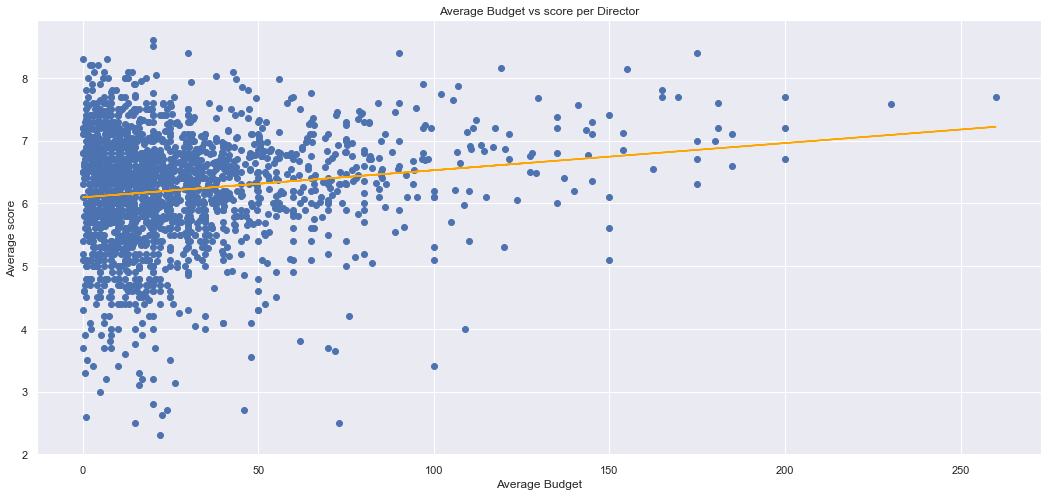

In [90]:
# Budget vs US ratings
plt.scatter(director_mean['budget'],director_mean['score'])
corr=round(st.pearsonr(director_mean['budget'],director_mean['score'])[0],2)
print(f"The correlation between the average budget and the average score is {corr}")
model = st.linregress(director_mean['budget'],director_mean['score'])
y_values = director_mean['budget']*model[0]+model[1]
plt.plot(director_mean['budget'],y_values,color='orange')
plt.xlabel('Average Budget')
plt.ylabel('Average score')
plt.title('Average Budget vs score per Director')
plt.show()

In [91]:
# For plot (Maybe not importent)
dfus=df_movies.loc[df_movies.country == 'United States']
dfus=dfus.groupby(['title_year'], as_index=False)[['budget', 'gross', 'score']].mean()
top15_usmovies = dfus.nlargest(15,['gross'])
dfww=df_movies.groupby(['title_year'], as_index=False)[['budget', 'gross', 'score']].mean()
top15_wwmovies = dfww.nlargest(15,['gross'])

In [93]:
top15_usmovies

title_year  budget        gross  score
302                                    Avatar_2009   237.0  2847.246203    7.8
304                         Avengers: Endgame_2019   356.0  2797.501328    8.4
3918                                  Titanic_1997   200.0  2201.647264    7.8
305                    Avengers: Infinity War_2018   321.0  2048.359754    8.4
3521                            The Lion King_2019   260.0  1670.727580    6.9
1714                           Jurassic World_2015   150.0  1670.516444    7.0
3119                             The Avengers_2012   220.0  1518.815515    8.0
1244                                Furious 7_2015   190.0  1515.341399    7.1
1234                                Frozen II_2019   150.0  1450.026933    6.8
303                   Avengers: Age of Ultron_2015   250.0  1402.809540    7.3
449                             Black Panther_2018   200.0  1347.597973    7.3
2926  Star Wars: Episode VIII - The Last Jedi_2017   317.0  1332.698830    7.0
1713           Jurassic World: Fallen Kingdom_2018   170.0  1310.466296    6.2
1236                                   Frozen_2013   150.0  1281.508100    7.4
377                      Beauty and the Beast_2017   160.0  1264.434525    7.1

In [94]:
def plot_genre_score (x):
    df_genre = df_movies.loc[df['genre'].str.contains(x)]
    sns.set(style="whitegrid")
    df1 = df_movies[['title_year','year','score','genre']]

    f, ax = plt.subplots(figsize=(9, 6))

    sns.set_color_codes("pastel")
    sns.barplot(x="year", y="score", data=df1,
            label="All Movies", color="b")

    sns.set_color_codes("muted")
    sns.barplot(x="year", y="score", data=df_genre,
            label=f"{x} Movies", color="b")

    ax.legend(loc="lower right", frameon=True)
    ticks = plt.setp(ax.get_xticklabels(),rotation=90)

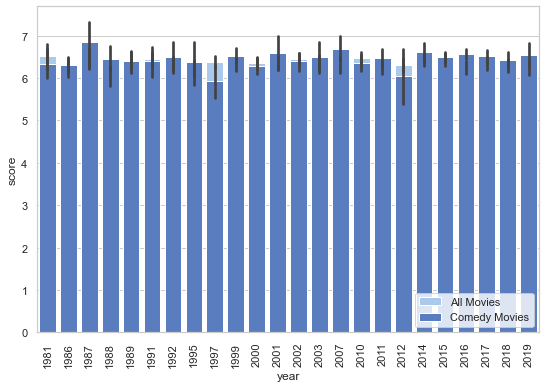

In [96]:
# THIS IS NOT WORKING 
plot_genre_score('Comedy')

In [101]:
df_movies

title_year  \
0          American Gigolo_1980   
1                  The Fog_1980   
2                 Cruising_1980   
3     When Time Ran Out..._1980   
4            Heaven's Gate_1980   
...                         ...   
5299           Killing Zoe_1994   
5300           Liebestraum_1991   
5301            Hatchet II_2010   
5302              Penelope_2006   
5303         Getting It on_1983   

                                                titleId                 title  \
0                                [tt0080365, tt4257262]       American Gigolo   
1     [tt0014051, tt0058270, tt0080749, tt0432291, t...               The Fog   
2                     [tt0080569, tt3696404, tt4828890]              Cruising   
3                                           [tt0081747]  When Time Ran Out...   
4     [tt0080855, tt11210146, tt12892296, tt14807362...         Heaven's Gate   
...                                                 ...                   ...   
5299                                        [tt0110265]           Killing Zoe   
5300                             [tt0102299, tt9915736]           Liebestraum   
5301                                        [tt1270835]            Hatchet II   
5302  [tt0060818, tt0472160, tt1119944, tt11646296, ...              Penelope   
5303                                        [tt0085588]         Getting It on   

     rating region      genre   released  year      month   day  ...  \
0         R     US      Crime 1980-02-01  1980   February   1.0  ...   
1         R     US     Horror 1980-02-08  1980   February   8.0  ...   
2         R     US      Crime 1980-02-15  1980   February  15.0  ...   
3        PG     US     Action 1980-03-28  1980      March  28.0  ...   
4         R     US  Adventure 1980-04-24  1980      April  24.0  ...   
...     ...    ...        ...        ...   ...        ...   ...  ...   
5299      R     US      Crime        NaT  1994  September   NaN  ...   
5300      R     US    Mystery        NaT  1991   November   NaN  ...   
5301      R     US     Action        NaT  2010   November   NaN  ...   
5302     PG     US     Comedy        NaT  2006   February  29.0  ...   
5303      R     US     Comedy        NaT  1983     August   NaN  ...   

                                            primaryName  \
0     [Christopher M. Campos, Gretchen Mol, Hector E...   
1     [Adrienne Barbeau, Allison Minick, Annie Hamil...   
2     [Al Pacino, Bud S. Smith, Gerald Walker, Jerry...   
3     [Carl Foreman, Edward Albert, Gordon Thomas, I...   
4     [A. Marshal Ward, Alessandro Zangirolami, Barr...   
...                                                 ...   
5299  [David Wasco, Eric Pascal Chaltiel, Eric Stolt...   
5300  [Bill Pullman, Eric Fellner, Kevin Anderson, K...   
5301  [Adam Green, Cory Neal, Danielle Harris, Derek...   
5302  [Agustin Adba, Alex Legend, Alexa Servodidio, ...   
5303  [Heather Kennedy, Jeff Edmond, Kathy Brickmeie...   

                                               category  \
0     {'Jerry Bruckheimer': 'producer', 'Jon Berntha...   
1     {'Tarun Bose': 'actor', 'Madan Puri': 'actor',...   
2     {'Karen Allen': 'actress', 'Gerald Walker': 'w...   
3     {'Gordon Thomas': 'writer', 'Jacqueline Bisset...   
4     {'Joe Ballew': 'actor', 'A. Marshal Ward': 'ac...   
...                                                 ...   
5299  {'Roger Avary': 'director', 'Samuel Hadida': '...   
5300  {'Kim Novak': 'actress', 'Martin Hunter': 'edi...   
5301  {'Adam Green': 'director', 'Kane Hodder': 'act...   
5302  {'Dick Shawn': 'actor', 'Scarlett Urbano': 'di...   
5303  {'William Olsen': 'director', 'Heather Kennedy...   

                                                 nconst  \
0     {'Jerry Bruckheimer': 'nm0000988', 'Jon Bernth...   
1     {'Tarun Bose': 'nm0097905', 'Madan Puri': 'nm0...   
2     {'Karen Allen': 'nm0000261', 'Gerald Walker': ...   
3     {'Gordon Thomas': 'nm0858883', 'Jacqueline Bis...   
4     {'Joe Ballew': 'nm6007580', 'A. Marshal War

In [102]:
def recommend_movies_on_actors(x):
        a = df[['title','score']][df['primaryName'] == x] [df['category'] == 'actor']
        a = a.sort_values(by = 'score', ascending = False)
        a = a.drop_duplicates(keep = 'first')
        return a.head(10)

In [103]:
# NEED FIX
def recommend_movies_on_directors(x):
        a = df[['title','score']][df['primaryName'] == x] [df['category'] == 'director']
        b = df[['title','score']][df['director'] == x]
        a = a.append(b)
        a = a.sort_values(by = 'score', ascending = False)
        a = a.drop_duplicates(keep = 'first')
        return a.head(10)

In [104]:
recommend_movies_on_directors('Asghar Farhadi')

C:\Users\hanlu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


title  score
172880     A Separation    8.3
162846   Darbareye Elly    8.0
205743     The Salesman    7.8
187202         The Past    7.7
214536  Everybody Knows    6.9

In [105]:
# NEED FIX 
def recommend_movies_on_writers(x):
        a = df[['title','score']][df['primaryName'] == x] [df['category'] == 'writer']
        a = a.sort_values(by = 'score', ascending = False)
        a = a.drop_duplicates(keep = 'first')
        return a.head(10)

In [106]:
#most recomended witers
a = df_movies[['title','score','primaryName']][df_movies['category'] == 'writer']
a = a.sort_values(by = 'score', ascending = False)
a = a.drop_duplicates(keep = 'first')
a.head(10)

Empty DataFrame
Columns: [title, score, primaryName]
Index: []

In [118]:
def best(x):
    a = df[['primaryName','score']][df['category'] == x]
    a = a.groupby(['primaryName']).mean()
    a = a.dropna()
    a = a.sort_values(by='score', ascending=0)[:50]
    b = df[['primaryName','gross']][df['category'] == x]
    b = b.groupby(['primaryName']).mean()
    b = b.dropna()
    b = b.sort_values(by='gross', ascending=0)[:50]
    b.index
    c = df[['primaryName','Profit']][df['category'] == x]
    c = c.groupby(['primaryName']).mean()
    c = c.dropna()
    c = c.sort_values(by='Profit', ascending=0)[:50]
    c.index
    
    best = a.index.intersection(b.index)
    best = best.intersection(c.index)
    
    from matplotlib_venn import venn2, venn2_circles
    set1 = set(a.index.values)
    set2 = set(c.index.values)
    v = venn2([set1, set2], ('Top 50 Average IMDB Score', 'Top 50 Average Profit'))
    plt.title(f"Who is the best {x}?" , fontsize=16,fontweight='bold',family='serif')
    beststr = ', '.join(best)
    for text in v.set_labels:
            text.set_fontsize(12)
            text.set_family('serif')
    plt.annotate(beststr,fontsize=12,family='serif',xy=v.get_label_by_id('11').get_position()- np.array([0, 0.05]), xytext=(-50,-50),
             ha='center',textcoords='offset points',bbox=dict(boxstyle='round,pad=0.5',fc='white'),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='black'))
    plt.show()



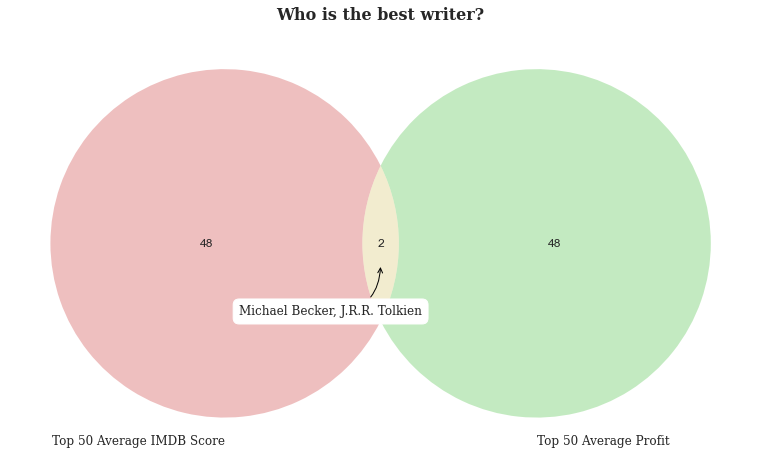

In [119]:
best('writer')

### Visulisation of correlation between attributes

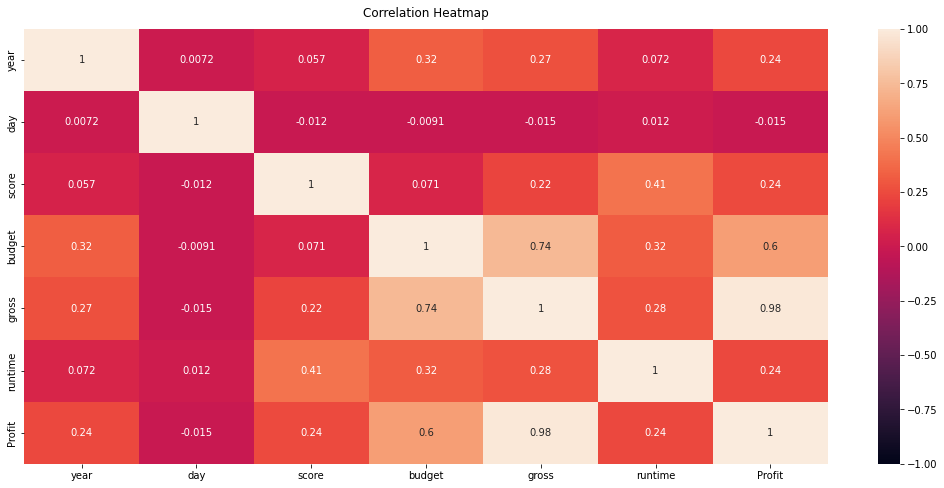

In [87]:
heatmap = sns.heatmap(df_movies.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12); 

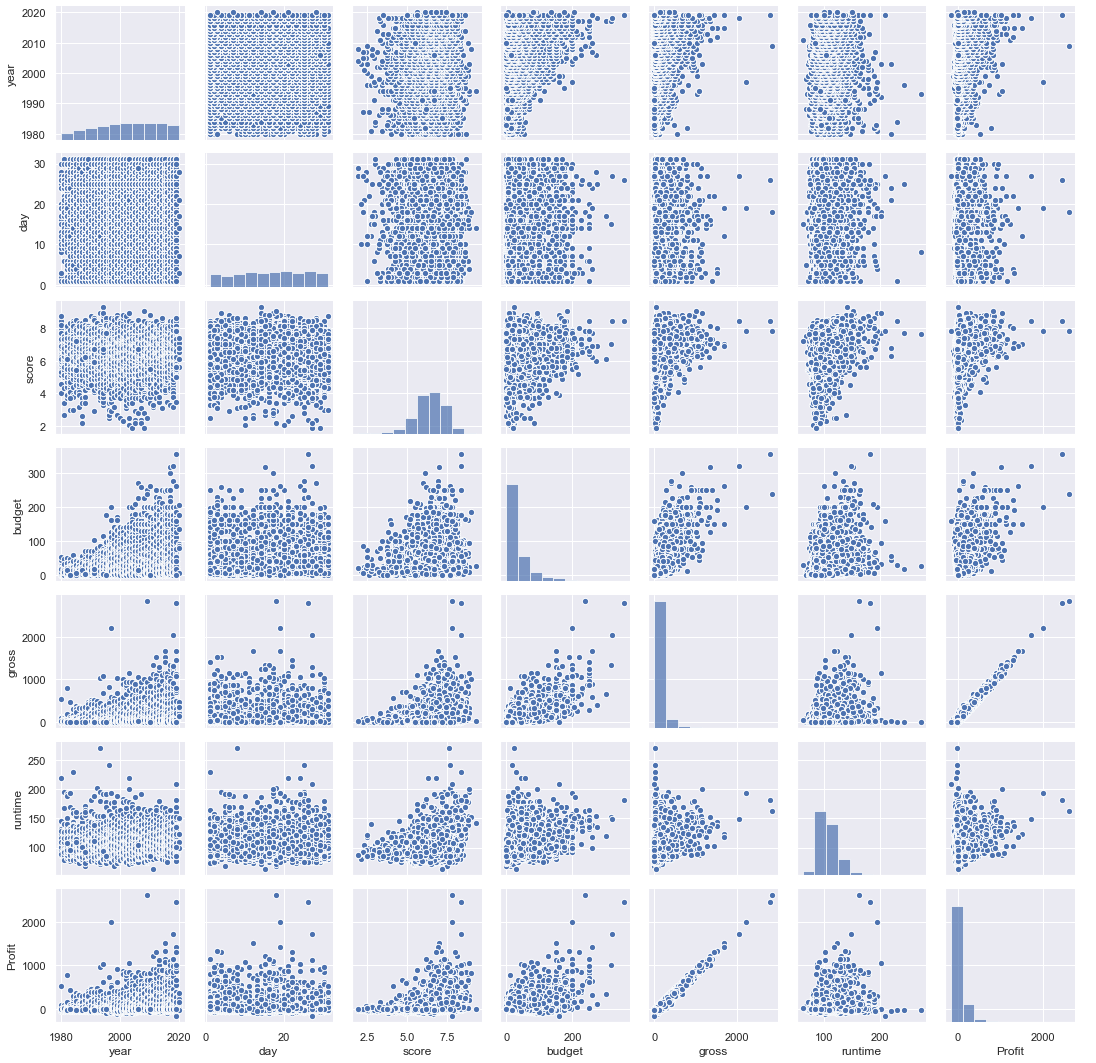

In [88]:
sns.set()

g = sns.PairGrid(df_movies)
g.fig.set_size_inches(15, 15)
g = g.map_diag(plt.hist, edgecolor = 'w', alpha = 0.7)
g = g.map_offdiag(plt.scatter, edgecolor = "w", s = 40)
g = g.add_legend()

sns.set()